<a href="https://colab.research.google.com/github/ceyhanyilmaz/KitNET-py/blob/master/wustl_Kitnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cudf

In [23]:
from drive.MyDrive.Kitnet import KitNET as kit
import numpy as np
import pandas as pd
import time
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from matplotlib.colors import ListedColormap

In [7]:
%load_ext cudf.pandas
wustl_df = pd.read_csv('/content/drive/MyDrive/Kitnet/kitnet_wustl.csv')
wustl_df.drop(['Dir','Attack Category'], axis=1,inplace=True)

In [8]:
wustl_df["SrcAddr"] = wustl_df["SrcAddr"].astype('category')
wustl_df["SrcAddr"] = wustl_df["SrcAddr"].cat.codes
wustl_df["SrcAddr"] = wustl_df["SrcAddr"].astype('float64')

wustl_df["DstAddr"] = wustl_df["DstAddr"].astype('category')
wustl_df["DstAddr"] = wustl_df["DstAddr"].cat.codes
wustl_df["DstAddr"] = wustl_df["DstAddr"].astype('float64')

wustl_df["SrcMac"] = wustl_df["SrcMac"].astype('category')
wustl_df["SrcMac"] = wustl_df["SrcMac"].cat.codes
wustl_df["SrcMac"] = wustl_df["SrcMac"].astype('float64')

wustl_df["DstMac"] = wustl_df["DstMac"].astype('category')
wustl_df["DstMac"] = wustl_df["DstMac"].cat.codes
wustl_df["DstMac"] = wustl_df["DstMac"].astype('float64')

wustl_df["Flgs"] = wustl_df["Flgs"].astype('category')
wustl_df["Flgs"] = wustl_df["Flgs"].cat.codes
wustl_df["Flgs"] = wustl_df["Flgs"].astype('float64')

wustl_df = wustl_df.astype('float64')

In [9]:
wustl_normal_df = wustl_df[wustl_df['Label']==0]
wustl_attack_df = wustl_df[wustl_df['Label']==1]

In [10]:
wustl_df.describe()

,Time,Flgs,SrcAddr,DstAddr,Sport,Dport,SrcBytes,DstBytes,SrcLoad,DstLoad,...,Packet_num,Temp,SpO2,Pulse_Rate,SYS,DIA,Heart_rate,Resp_Rate,ST,Label
count,16318.000000,16318.000000,16318.0,16318.0,16318.000000,16318.0,16318.000000,16318.000000,1.631800e+04,1.631800e+04,...,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000,16318.000000
mean,4.932890,3.789190,0.0,0.0,57347.716816,1111.0,496.650264,187.077706,2.118406e+05,7.102435e+04,...,8156.308800,26.906815,97.808861,76.723741,142.846611,80.094190,75.443927,19.695551,0.258007,0.125383
std,2.818966,0.948991,0.0,0.0,4788.751671,0.0,28.584642,18.688525,7.942988e+04,4.530811e+04,...,4709.735634,0.919766,1.496269,7.431914,8.493933,6.125289,6.609102,7.325856,0.103980,0.331163
min,0.000000,0.000000,0.0,0.0,0.000000,1111.0,310.000000,120.000000,0.000000e+00,5.074470e+02,...,1.000000,23.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000
25%,2.510820,4.000000,0.0,0.0,53269.250000,1111.0,496.000000,186.000000,1.990535e+05,6.635500e+04,...,4077.250000,26.600000,98.000000,73.000000,142.000000,76.000000,73.000000,18.000000,0.200000,0.000000
50%,4.970435,4.000000,0.0,0.0,57360.500000,1111.0,496.000000,186.000000,2.366790e+05,7.889300e+04,...,8156.500000,27.000000,98.000000,73.000000,144.000000,83.000000,73.000000,19.000000,0.300000,0.000000
75%,7.364574,4.000000,0.0,0.0,61450.750000,1111.0,496.000000,186.000000,2.615570e+05,8.719300e+04,...,12234.750000,27.600000,98.000000,79.000000,148.000000,84.000000,79.000000,24.000000,0.300000,0.000000
max,9.778158,6.000000,0.0,0.0,65535.000000,1111.0,2298.000000,882.000000,1.134000e+06,3.938000e+06,...,16314.000000,29.200000,100.000000,194.000000,149.000000,95.000000,119.000000,73.000000,1.000000,1.000000


Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running KitNET:
The Feature-Mapper found a mapping: 42 features to 22 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
Feature-Mapper: execute-mode, Anomaly-Detector: exeute-mode
0.9997957516339869
0.0
12.604828302256504
0.0
9.778157667
Complete. Time elapsed: 24.548882246017456


<Figure size 640x480 with 0 Axes>

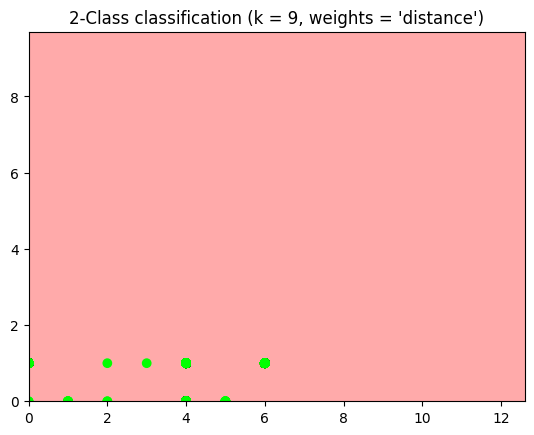

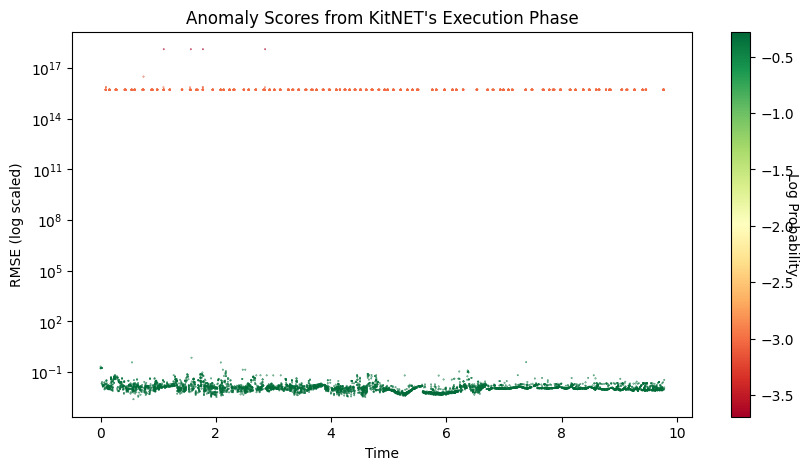

Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running KitNET:
The Feature-Mapper found a mapping: 42 features to 26 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
Feature-Mapper: execute-mode, Anomaly-Detector: exeute-mode
1.0
0.0
11.59475565080057
0.0
9.778157667
Complete. Time elapsed: 27.73539161682129


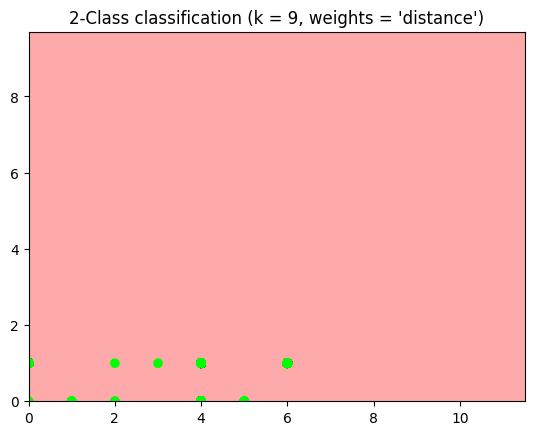

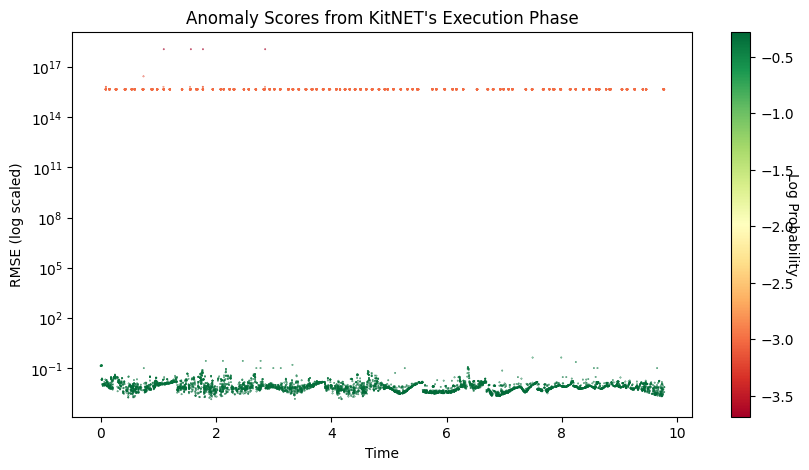

Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running KitNET:
The Feature-Mapper found a mapping: 42 features to 25 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
Feature-Mapper: execute-mode, Anomaly-Detector: exeute-mode
1.0
0.0
11.824377063754463
0.0
9.778157667
Complete. Time elapsed: 27.102168798446655


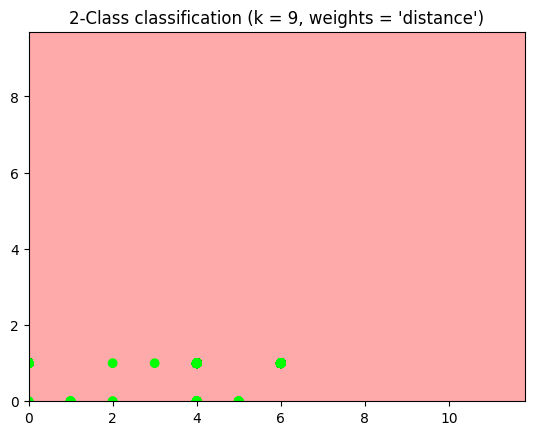

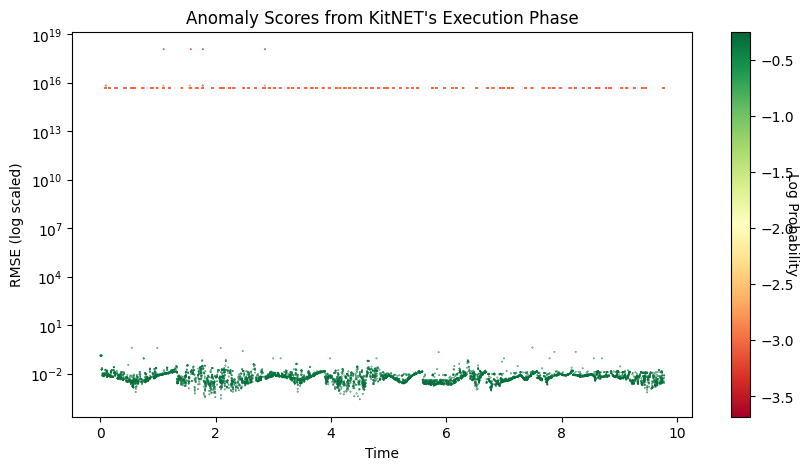

Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running KitNET:
The Feature-Mapper found a mapping: 42 features to 26 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
Feature-Mapper: execute-mode, Anomaly-Detector: exeute-mode
1.0
0.0
11.59475565080057
0.0
9.778157667
Complete. Time elapsed: 27.789032697677612


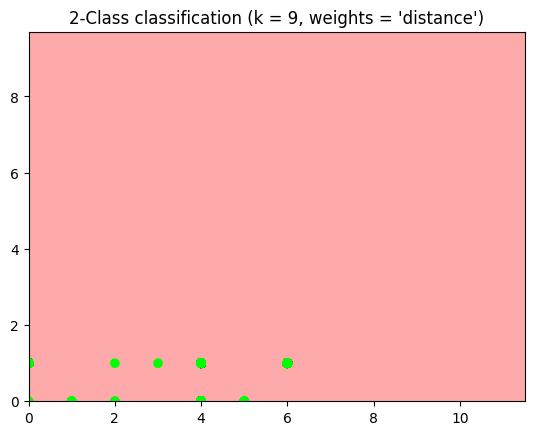

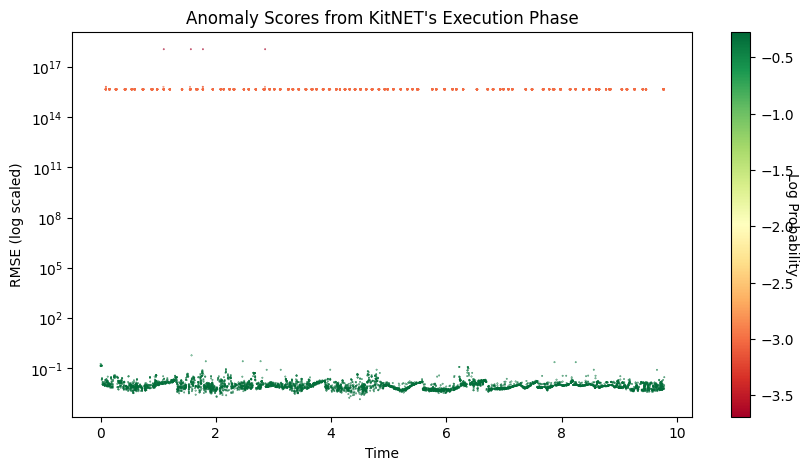

Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running KitNET:
The Feature-Mapper found a mapping: 42 features to 21 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
Feature-Mapper: execute-mode, Anomaly-Detector: exeute-mode
1.0
0.0
12.901453081036788
0.0
9.778157667
Complete. Time elapsed: 23.183915376663208


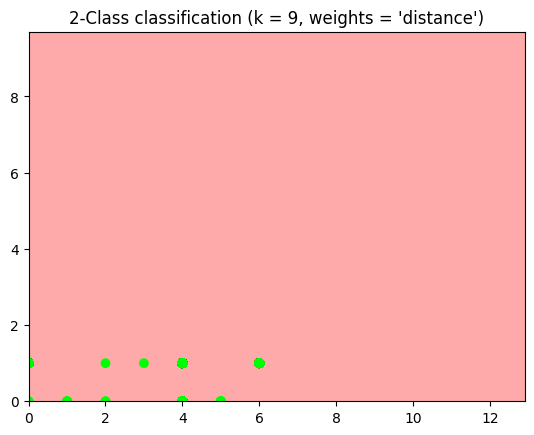

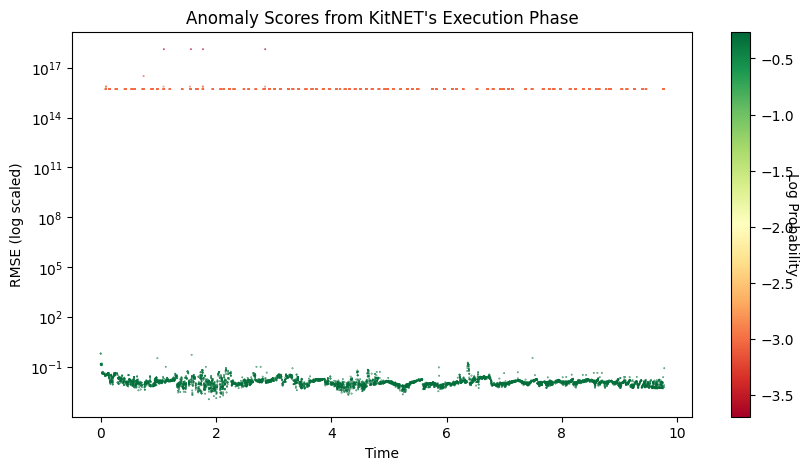

Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running KitNET:
The Feature-Mapper found a mapping: 42 features to 25 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
Feature-Mapper: execute-mode, Anomaly-Detector: exeute-mode
1.0
0.0
11.824377063754463
0.0
9.778157667
Complete. Time elapsed: 27.25743055343628


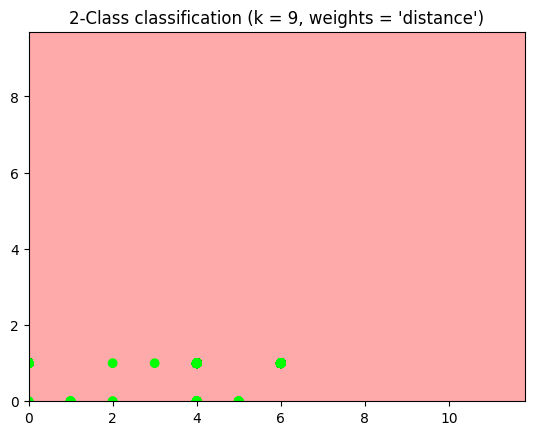

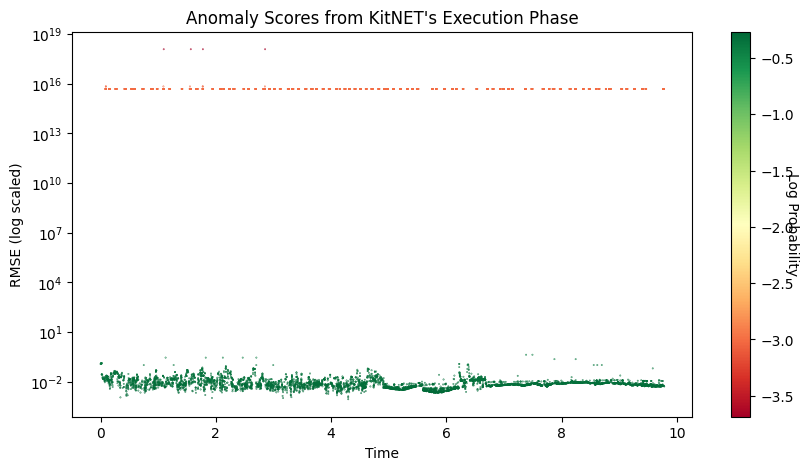

Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running KitNET:
The Feature-Mapper found a mapping: 42 features to 25 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
Feature-Mapper: execute-mode, Anomaly-Detector: exeute-mode
1.0
0.0
11.824377063754463
0.0
9.778157667
Complete. Time elapsed: 27.283403396606445


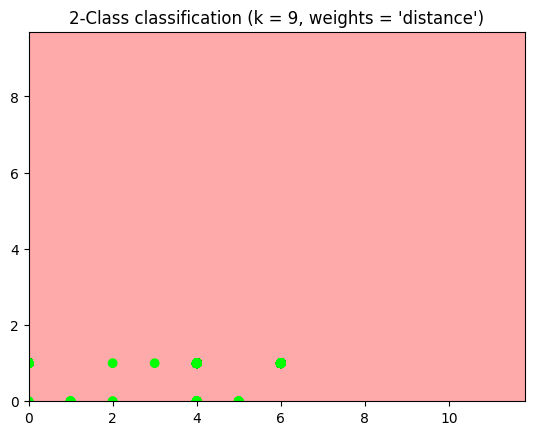

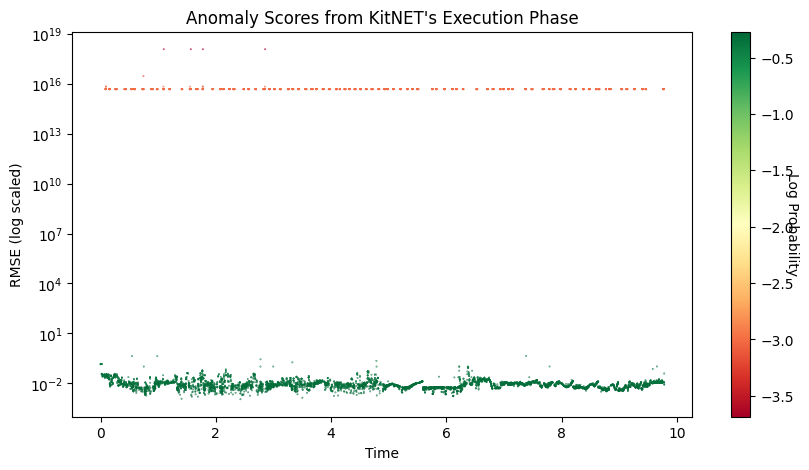

Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running KitNET:
The Feature-Mapper found a mapping: 42 features to 27 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
Feature-Mapper: execute-mode, Anomaly-Detector: exeute-mode
1.0
0.0
11.378012134597126
0.0
9.778157667
Complete. Time elapsed: 28.094922304153442


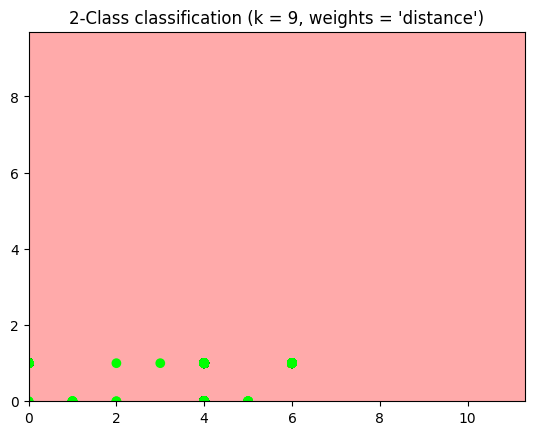

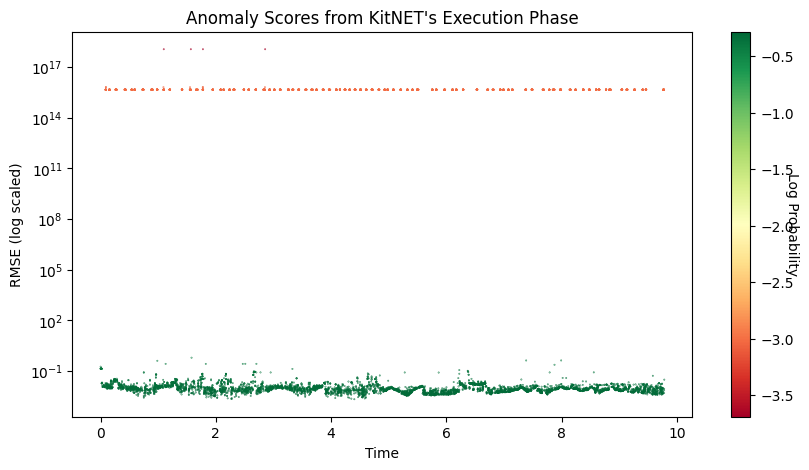

Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running KitNET:
The Feature-Mapper found a mapping: 42 features to 26 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
Feature-Mapper: execute-mode, Anomaly-Detector: exeute-mode
1.0
0.0
11.59475565080057
0.0
9.778157667
Complete. Time elapsed: 27.67190408706665


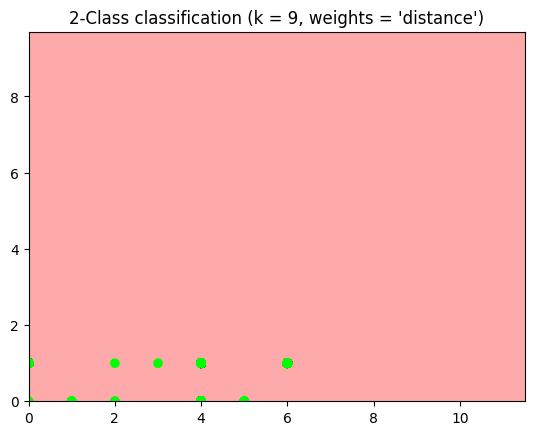

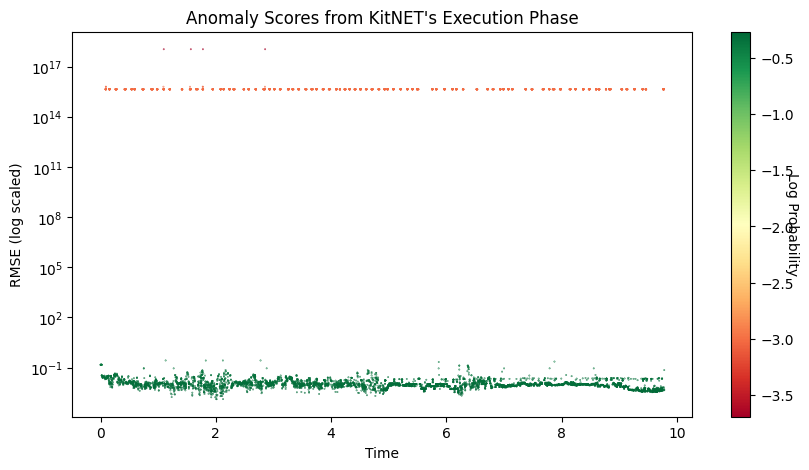

Feature-Mapper: train-mode, Anomaly-Detector: off-mode
Running KitNET:
The Feature-Mapper found a mapping: 42 features to 22 autoencoders.
Feature-Mapper: execute-mode, Anomaly-Detector: train-mode
Feature-Mapper: execute-mode, Anomaly-Detector: exeute-mode
1.0
0.0
12.604828302256504
0.0
9.778157667
Complete. Time elapsed: 23.543616771697998


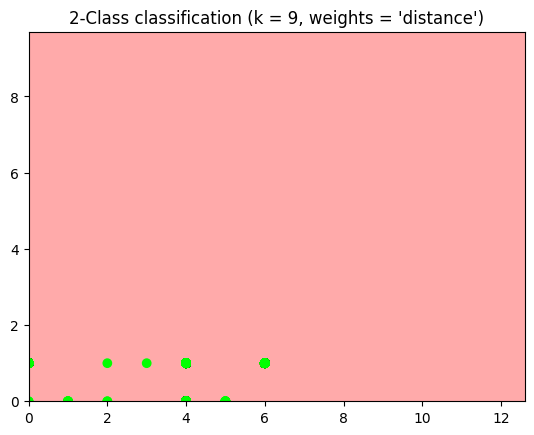

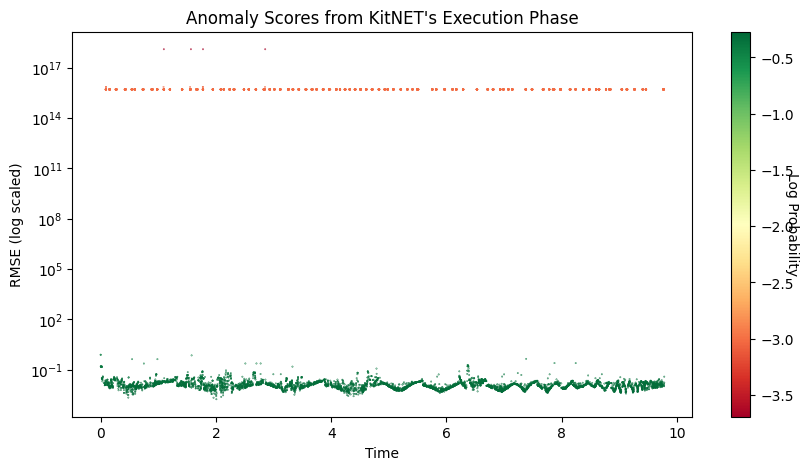

In [40]:
plt.figure()
for f in range(10):
  normal_X = wustl_normal_df.to_numpy()[:,:-1]
  normal_y = wustl_normal_df.to_numpy()[:,-1:]
  X_train, X_test, y_train, y_test = train_test_split(normal_X, normal_y, test_size=0.4)

  attack_X = wustl_attack_df.to_numpy()[:,:-1]
  attack_y = wustl_attack_df.to_numpy()[:,-1:]

  X_tst = np.concatenate((X_test, attack_X), axis=0)
  y_tst = np.concatenate((y_test, attack_y), axis=0)
  y = np.concatenate((y_train, y_tst), axis=0)
  tm = np.concatenate((X_train,X_tst),axis=0)[:,0:1].flatten()
  X = np.concatenate((X_train,X_tst),axis=0)[:,1:]
  maxAE = 10
  FMgrace = 100
  ADgrace = int(X_train.shape[0])

  K = kit.KitNET(X.shape[1], maxAE,FMgrace,ADgrace)
  RMSEs = np.zeros(X.shape[0])

  print("Running KitNET:")
  start = time.time()

  for i in range(X.shape[0]):
    RMSEs[i] = K.process(X[i,])
  KNN_X = RMSEs.reshape(-1,1)
  KNN_y = y.ravel()
  knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(KNN_X,KNN_y,test_size=0.3)
  knn = neighbors.KNeighborsClassifier(n_neighbors=9)
  knn.fit(knn_X_train, knn_y_train)
  print(knn.score(knn_X_test, knn_y_test))
  n_neighbors = 9
  h = 0.1
  cmap_light = ListedColormap(['#FFAAAA'])
  cmap_bold = ListedColormap([ '#00FF00'])

  clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
  clf.fit(KNN_X,KNN_y)
  x_min, x_max = np.min(KNN_X), np.max(KNN_X)/10**17
  y_min, y_max = np.min(tm), np.max(tm)
  print(x_min)
  print(x_max)
  print(y_min)
  print(y_max)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  plt.scatter(X[:, 0], y, c=y, cmap=cmap_bold)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title("2-Class classification (k = %i, weights = '%s')" % (n_neighbors, 'distance'))


  stop = time.time()
  print("Complete. Time elapsed: "+ str(stop - start))
  benignSample = np.log(RMSEs[FMgrace+ADgrace+1:16318])
  logProbs = norm.logsf(np.log(RMSEs), np.mean(benignSample), np.std(benignSample))

  plt.figure(figsize=(10,5))
  fig = plt.scatter(tm[FMgrace+ADgrace+1:],RMSEs[FMgrace+ADgrace+1:],s=0.1,c=logProbs[FMgrace+ADgrace+1:],cmap='RdYlGn')
  plt.yscale("log")
  plt.title("Anomaly Scores from KitNET's Execution Phase")
  plt.ylabel("RMSE (log scaled)")
  plt.xlabel("Time")
  figbar=plt.colorbar()
  figbar.ax.set_ylabel('Log Probability\n ', rotation=270)
  plt.show()
